In [56]:
import pandas as pd
import numpy as np

In [12]:
otu_table = pd.read_table('otu_table.tsv', skiprows=1)

/home/dmitry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [68]:
print(otu_table.shape)
otu_table.head()

(646, 3)


,#OTU ID,bone,calculus
0,New.0.CleanUp.ReferenceOTU6,5.0,0.0
1,New.0.CleanUp.ReferenceOTU13,10.0,0.0
2,New.0.CleanUp.ReferenceOTU17,26.0,0.0
3,New.0.CleanUp.ReferenceOTU18,2.0,0.0
4,New.0.CleanUp.ReferenceOTU20,2.0,0.0


In [69]:
tax_table = pd.read_table('qiime_out/uclust_assigned_taxonomy/rep_set_tax_assignments.txt',
                         header=None)
print(tax_table.shape)
tax_table.head()

(740, 4)


/home/dmitry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,0,1,2,3
0,New.0.CleanUp.ReferenceOTU88,k__Bacteria; p__Actinobacteria; c__Actinobacte...,1.00,2
1,New.1.CleanUp.ReferenceOTU349,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,1.00,3
2,New.1.CleanUp.ReferenceOTU310,k__Bacteria; p__Actinobacteria; c__Coriobacter...,0.67,3
3,New.1.CleanUp.ReferenceOTU314,Unassigned,1.00,1
4,New.1.CleanUp.ReferenceOTU317,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,1.00,1


In [30]:
uniques = set()
for row in tax_table.loc[:,1]:
    [uniques.add(x) for x in row.split()]

In [59]:
len(uniques)

358

In [33]:
uniques

{'Unassigned',
 'c__0319-6E2;',
 'c__12-24;',
 'c__;',
 'c__Acidimicrobiia;',
 'c__Acidobacteria-6;',
 'c__Acidobacteriia;',
 'c__Actinobacteria;',
 'c__Alphaproteobacteria',
 'c__Alphaproteobacteria;',
 'c__Anaerolineae;',
 'c__BD1-5;',
 'c__Bacilli',
 'c__Bacilli;',
 'c__Bacteroidia;',
 'c__Betaproteobacteria;',
 'c__Clostridia;',
 'c__Coriobacteriia;',
 'c__Cytophagia;',
 'c__DA052;',
 'c__Deltaproteobacteria;',
 'c__Ellin6529;',
 'c__Epsilonproteobacteria;',
 'c__Flavobacteriia;',
 'c__Fusobacteriia;',
 'c__GN05;',
 'c__Gammaproteobacteria;',
 'c__Gemm-1;',
 'c__Gemm-5;',
 'c__MB-A2-108;',
 'c__Nitrospira;',
 'c__PRR-12;',
 'c__Planctomycetia;',
 'c__SAR202;',
 'c__SJA-4;',
 'c__Sphingobacteriia;',
 'c__Synergistia;',
 'c__TA18;',
 'c__TM7-1;',
 'c__TM7-3;',
 'c__Thermoleophilia;',
 'c__Thermomicrobia;',
 'c__Verrucomicrobiae;',
 'c__[Saprospirae];',
 'c__iii1-8;',
 'f__0319-6A21;',
 'f__;',
 'f__AKIW874;',
 'f__Acetobacteraceae;',
 'f__Actinomycetaceae;',
 'f__Actinosynnemataceae;

In [39]:
from collections import defaultdict
bac_count = defaultdict(float)
boi = ['g__Tannerella;', 'g__Porphyromonas;']
for row in tax_table.loc[:, 1]:
    row = row.split(' ')
    for ent in row:
        if ent in boi:
            bac_count[ent] += 1

In [40]:
bac_count

defaultdict(float, {'g__Porphyromonas;': 1.0, 'g__Tannerella;': 2.0})

In [41]:
bac_count = defaultdict(float)
for row in tax_table.loc[:, 1]:
    row = row.split(' ')
    for ent in row:
        if ent in boi:
            bac_count[ent] += 1/len(row)

In [42]:
bac_count

defaultdict(float,
            {'g__Porphyromonas;': 0.14285714285714285,
             'g__Tannerella;': 0.2857142857142857})

In [43]:
bac_count = defaultdict(float)
for row in tax_table.loc[:, 1]:
    row = row.split(' ')
    for ent in row:
        if ent != 'Unassigned':
            bac_count[ent] += 1/len(row)

/home/dmitry/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


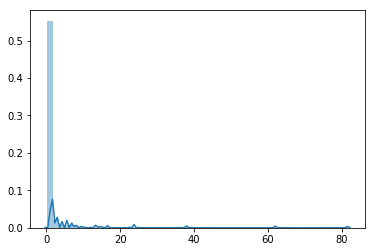

In [67]:
sns.distplot([v for _, v in bac_count.items()])

In [55]:
max(bac_count, key=bac_count.get)

'k__Bacteria;'

In [72]:
sorted(bac_count, key=bac_count.get)[::-1]

['k__Bacteria;',
 's__',
 'g__;',
 'p__Proteobacteria;',
 'p__Firmicutes;',
 'c__Clostridia;',
 'o__Clostridiales;',
 'p__Actinobacteria;',
 'f__;',
 'c__Actinobacteria;',
 'o__Actinomycetales;',
 'p__Bacteroidetes;',
 'c__Alphaproteobacteria;',
 'c__Betaproteobacteria;',
 'c__Bacilli;',
 'o__;',
 'c__Gammaproteobacteria;',
 'f__[Mogibacteriaceae];',
 'o__Burkholderiales;',
 'o__Rhizobiales;',
 'k__Bacteria',
 'o__Bacillales;',
 'p__TM7;',
 'o__Flavobacteriales;',
 'c__Flavobacteriia;',
 'c__TM7-3;',
 'o__Xanthomonadales;',
 'f__Flavobacteriaceae;',
 'c__Deltaproteobacteria;',
 'f__[Tissierellaceae];',
 'f__Alcaligenaceae;',
 'f__Coriobacteriaceae;',
 'o__Coriobacteriales;',
 'c__Coriobacteriia;',
 'o__Lactobacillales;',
 'f__Bacillaceae;',
 'o__Rhizobiales',
 'o__Actinomycetales',
 'o__Clostridiales',
 'p__Proteobacteria',
 'f__Microbacteriaceae;',
 'f__Cytophagaceae;',
 'o__Cytophagales;',
 'c__Cytophagia;',
 'g__Actinomyces;',
 'f__Actinomycetaceae;',
 'c__Thermoleophilia;',
 'f__Hy

In [58]:
np.mean([v for _, v in bac_count.items()])

1.4705882352941189